In [35]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../assets/cleaned_data.csv')
df.head()


,id,building_type,building_subtype,price,living_area,frontages,bedrooms,bathrooms,liv_room_surf,kitchen_type,...,swimming_pool,status_build,furnished,energy_class,heating,flood_zone,surroundings,zipcode,municipality,province
0,10567498,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1050,Ixelles,Brussels Capital Region
1,10567435,apartment,loft,775000.0,258.0,2.0,2.0,1.0,NaN,3.0,...,NaN,2.0,1.0,7.0,Gas,Non flood zone,NaN,3020,Winksele,Flemish Brabant
2,10557731,apartment,apartment,99000.0,94.0,4.0,2.0,1.0,34.0,1.0,...,0.0,2.0,0.0,3.0,Gas,Non flood zone,Urban,4820,Dison,Liège
3,10567501,apartment,apartment,730000.0,212.0,3.0,4.0,2.0,60.0,1.0,...,0.0,2.0,0.0,2.0,Gas,NaN,Isolated,1060,Saint-Gilles,Brussels Capital Region
4,10557727,apartment,apartment,219000.0,111.0,2.0,3.0,1.0,30.0,1.0,...,0.0,2.0,0.0,6.0,Gas,Non flood zone,Isolated,4680,Oupeye,Liège


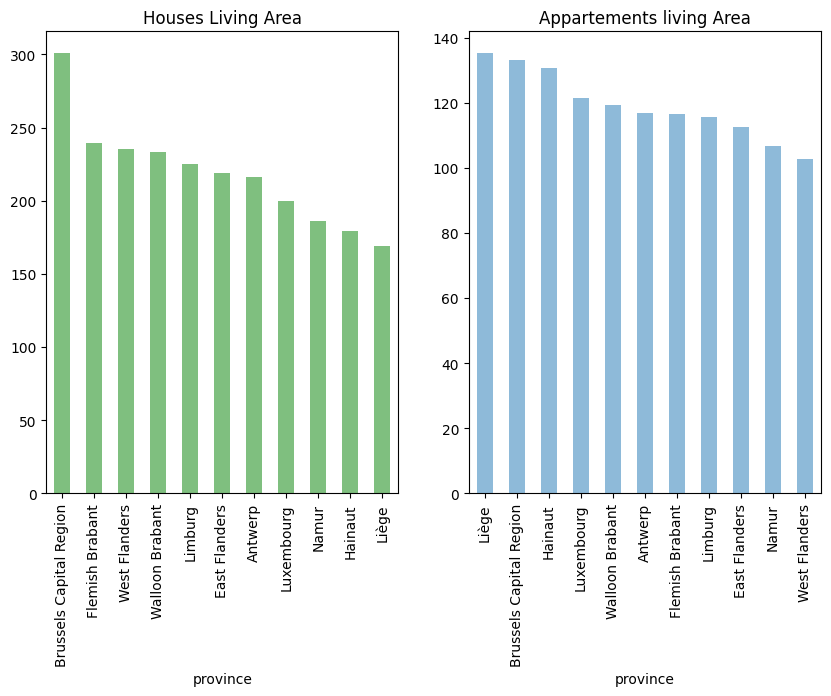

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
df['price_per_m2'] = df['price'] / df['living_area']

df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_price = df_houses.groupby('province')['living_area'].mean()
df_appartments_price = df_appartments.groupby('province')['living_area'].mean()
#df_price_per_m2_per_municipality = df.groupby('province')['living_area'].mean()
df_houses_price.nlargest(30).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses Living Area')
df_appartments_price.nlargest(30).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements living Area')
#df_price_per_m2_per_municipality.nlargest(30).plot(kind= "bar")

plt.show()


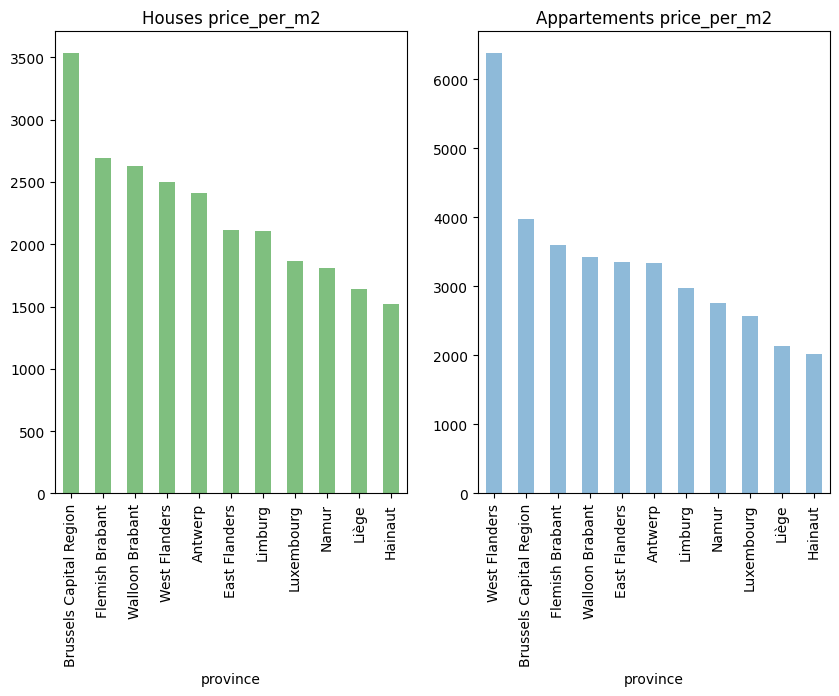

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
df['price_per_m2'] = df['price'] / df['living_area']

df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_price = df_houses.groupby('province')['price_per_m2'].mean()
df_appartments_price = df_appartments.groupby('province')['price_per_m2'].mean()
#df_price_per_m2_per_municipality = df.groupby('province')['living_area'].mean()
df_houses_price.nlargest(30).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses price_per_m2')
df_appartments_price.nlargest(30).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements price_per_m2')
#df_price_per_m2_per_municipality.nlargest(30).plot(kind= "bar")
plt.show()

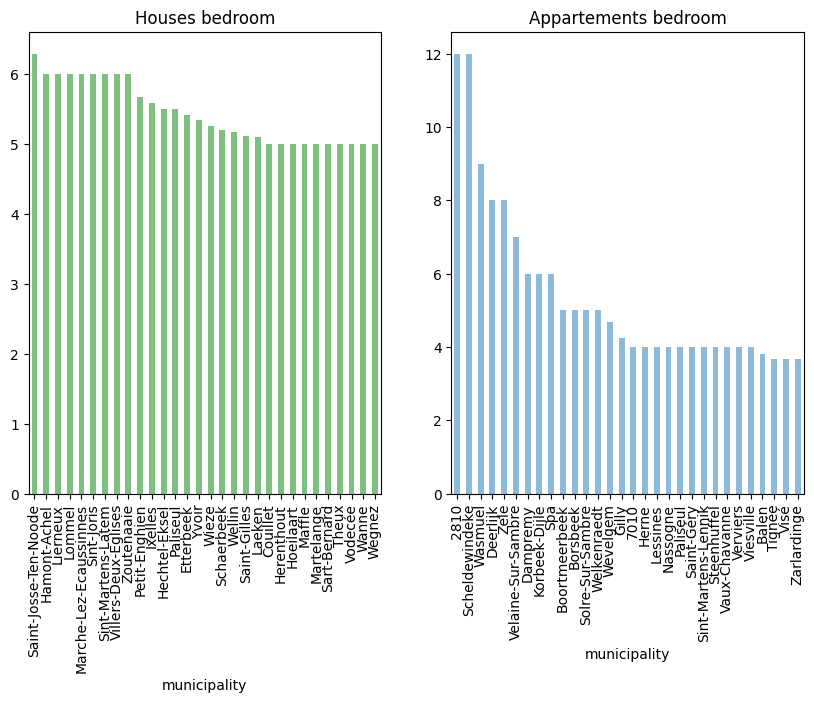

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']

df_houses_price = df_houses.groupby('municipality')['bedrooms'].mean()
df_appartments_price = df_appartments.groupby('municipality')['bedrooms'].mean()

df_houses_price.nlargest(30).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses bedroom')
df_appartments_price.nlargest(30).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements bedroom')

plt.show()

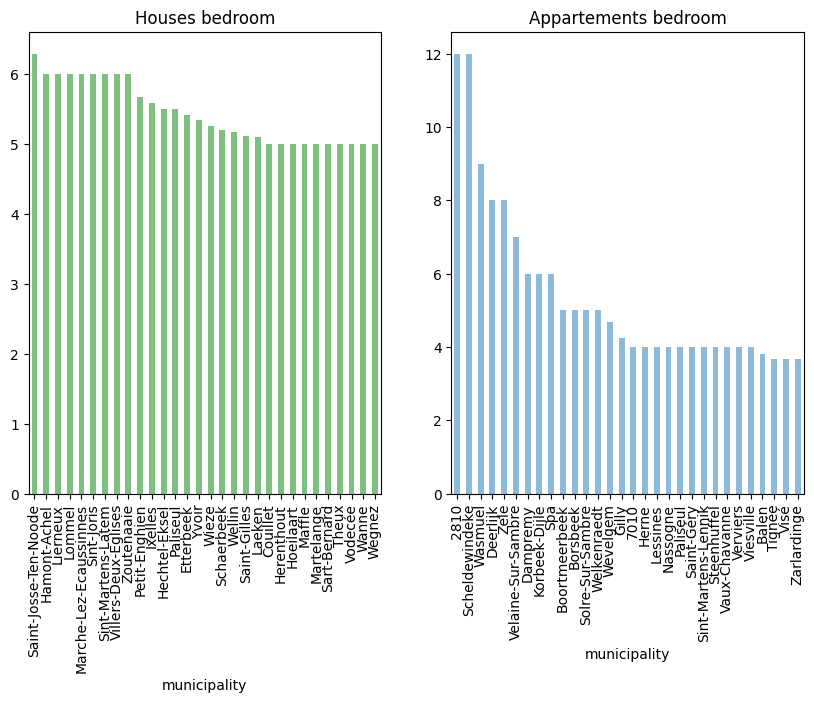

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))


df_houses = df[df['building_type'] == 'house']
df_appartments = df[df['building_type'] == 'apartment']
df_houses_price = df_houses.groupby('municipality')['bedrooms'].mean()
df_appartments_price = df_appartments.groupby('municipality')['bedrooms'].mean()
df_houses_price.nlargest(30).plot(kind ="bar", color = 'green' , alpha = 0.50, ax=ax1) 
ax1.set_title('Houses bedroom')
df_appartments_price.nlargest(30).plot(kind ="bar", alpha = 0.50, ax=ax2)
ax2.set_title('Appartements bedroom')

plt.show()

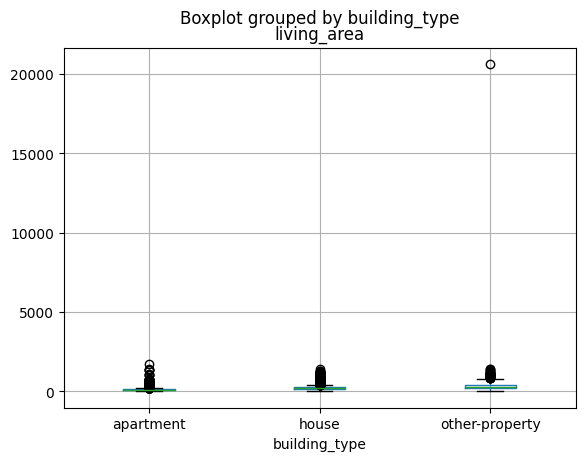

In [69]:
df.boxplot(column='living_area', by='building_type')

plt.show()

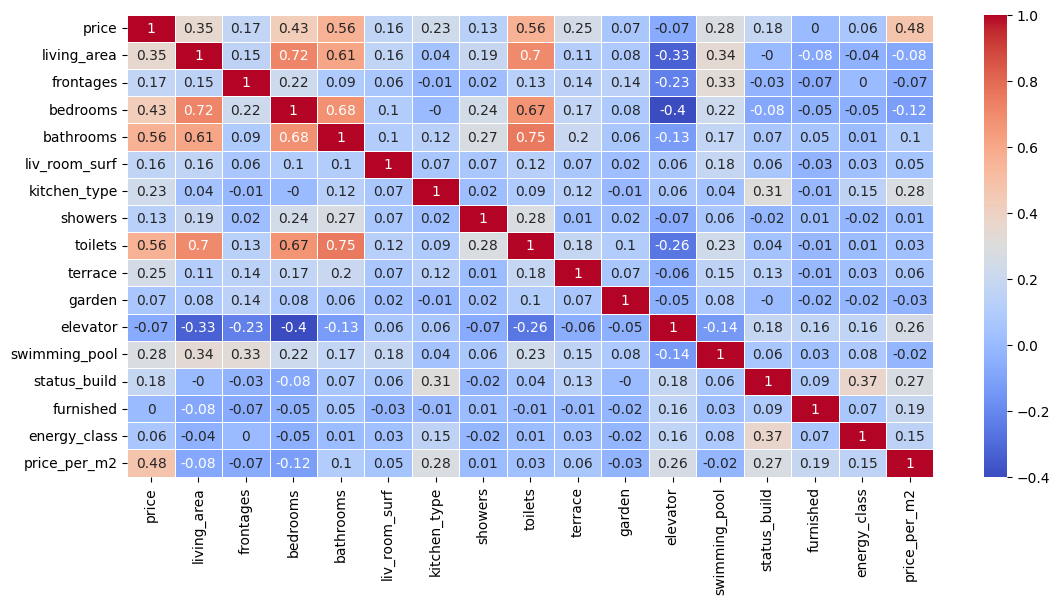

In [13]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings','basement', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'province']) 
correlation_df = correlation.corr().round(2)

plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks()
plt.show()